In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import Ridge



In [3]:
data = pd.read_csv(r"C:\Users\veesa\Downloads\supermarket_sales - Sheet1.csv")
data.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [7]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<Axes: xlabel='Gender', ylabel='count'>

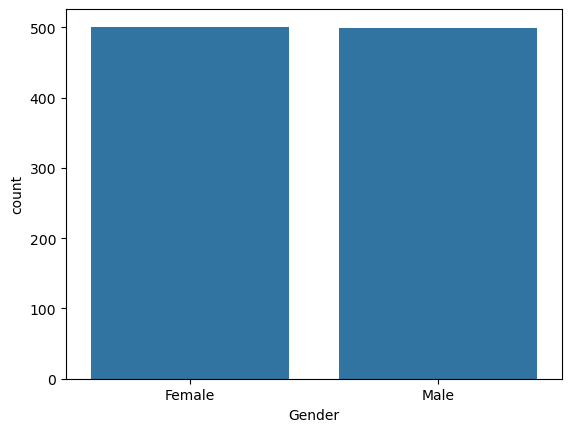

In [11]:
sns.countplot(x='Gender', data=data)

In [13]:
s= data.groupby("City")["gross income"].sum()
print (s)

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64


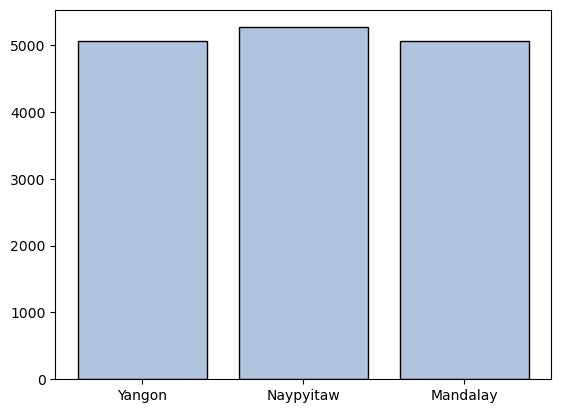

In [15]:
plt.bar(data["City"].unique(), s, edgecolor="black", color= "lightsteelblue")
plt.show()

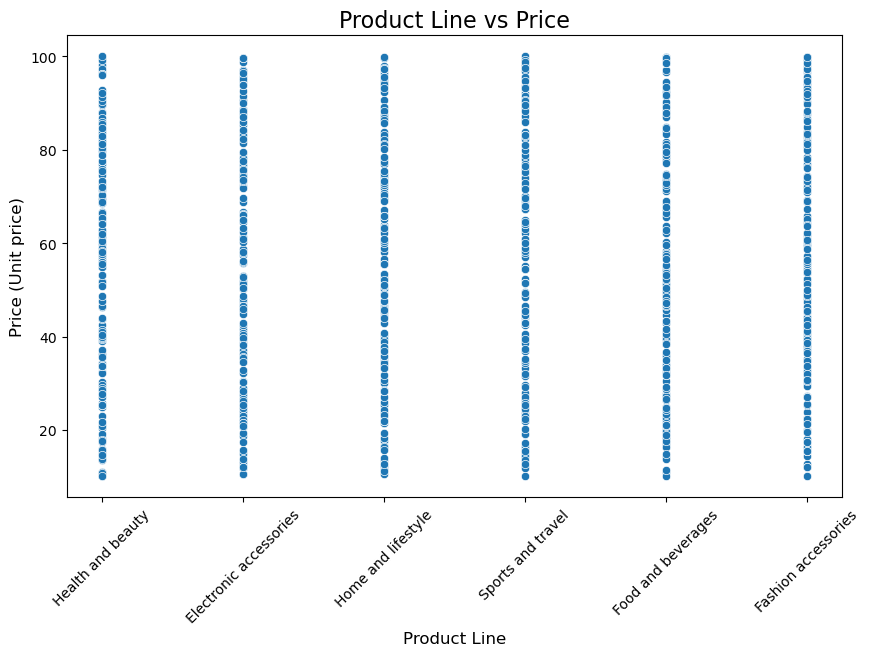

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Product line', y='Unit price', data=data)
plt.title('Product Line vs Price', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Price (Unit price)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [23]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [27]:
X = data.drop(columns=['Total', 'cogs', 'gross margin percentage'])  # Adjust as needed
y = data[['Total', 'cogs', 'gross margin percentage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Identify numerical and categorical columns
num_features = ['Unit price', 'Quantity', 'Tax 5%']  # Adjust based on your data
cat_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])


In [31]:
from sklearn.preprocessing import StandardScaler
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)


In [33]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [41]:
model = MultiOutputRegressor(LinearRegression())

cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='r2')
print(f'Cross-validation scores: {cv_scores}')


Cross-validation scores: [1. 1. 1. 1. 1.]


In [47]:
param_grid = {'alpha': np.logspace(-4, 4, 10)}  # Example for Ridge regression
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_transformed, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_


Best parameters: {'alpha': 0.0001}


In [49]:
y_pred = best_model.predict(X_test_transformed)


In [51]:
for i, column in enumerate(y_test.columns):
    print(f'Performance metrics for {column}:')
    print(f'Mean Squared Error: {mean_squared_error(y_test.iloc[:, i], y_pred[:, i])}')
    print(f'R^2 Score: {r2_score(y_test.iloc[:, i], y_pred[:, i])}')


Performance metrics for Total:
Mean Squared Error: 7.767399825050863e-09
R^2 Score: 0.9999999999998807
Performance metrics for cogs:
Mean Squared Error: 7.045260607064958e-09
R^2 Score: 0.9999999999998807
Performance metrics for gross margin percentage:
Mean Squared Error: 0.0
R^2 Score: 1.0
